In [20]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import (
    f1_score, make_scorer, accuracy_score
)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_digits

from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

Задача 1\. 

Пусть $X$ - это целочисленная матрица, $W$ - целочисленная матрица размера 3х3. Реализуйте функцию `conv(X, W)`, которая возращает массив, каждый элемент которого рассчитывается по правилу:

$$Y_{i,j} = \sum_{0<=a,b<=2}W_{a,b}X_{i+a,j+b}$$

Самостоятельно выберите способ решение проблем с рассчетом значений на краях матрицы. Явно опишите и обоснуйте выбранный подход.

Загрузите датасет с цифрами при помощи функции `sklearn.datasets.load_digits`. Возьмите любое изображение и преобразуйте его к двумерному массиву 8х8.

Примените к полученному изображению операцию свертки с ядром `W`

$$
W = \begin{bmatrix}
0 & \frac{1}{5} & 0 \\
\frac{1}{5} & \frac{1}{5} & \frac{1}{5} \\
0 & \frac{1}{5} & 0 
\end{bmatrix}
$$

Выведите исходное и преобразованное изображение на экран.

In [2]:
X = np.random.randint(0, 10, (3, 3))  # создаем случайные массивы
W = np.random.randint(0, 10, (3, 3))
X, W

(array([[9, 6, 0],
        [4, 9, 5],
        [6, 6, 3]]),
 array([[8, 9, 3],
        [3, 2, 7],
        [6, 4, 4]]))

In [3]:
def conv(X, W, a_i=3, b_i=3):
    calc_shape = (
        X.shape[0] - W.shape[0] + 1,
        X.shape[1] - W.shape[1] + 1,
    )
    
    Y = np.zeros(calc_shape)
    
    for i in range(calc_shape[0]):
        for j in range(calc_shape[1]):
            Y[i][j] = sum(  # проходим по каждому эелементу согласно формуле
                W[a][b] * X[i+a][j+b]
                for a in range(a_i)
                for b in range(b_i)
            )
    return Y

##### При итериции по матрицам сумма индексов выходит за границы "IndexError: index 3 is out of bounds for axis 0 with size 3", для этого учитыаем размеры W

In [4]:
conv(X, W)

array([[263.]])

In [5]:
dataset = load_digits()  # загружаем датасет и выводим размерность матрицы
dataset.images[0].shape

(8, 8)

In [6]:
W = np.array(  # задаём ядро W
    [
        [0, 0.2, 0],
        [0.2, 0.2, 0.2],
        [0, 0.2, 0]
    ]
)

In [7]:
conv_image = conv(dataset.images[0], W)  # применяем операцию свёртки используя созданную функцию
conv_image

array([[ 3.2,  9.6, 10.6,  9.8,  8.4,  5.6],
       [ 4.4,  9. ,  6.4,  4.6,  8.4,  6.4],
       [ 4.8,  7.8,  2.8,  1.6,  7.2,  6.4],
       [ 4.2,  7.2,  1.6,  2. ,  7.4,  6.4],
       [ 4.4,  7.4,  3.4,  4.6,  8.2,  5.4],
       [ 4. ,  7.6,  8.4,  7.6,  6.8,  3.8]])

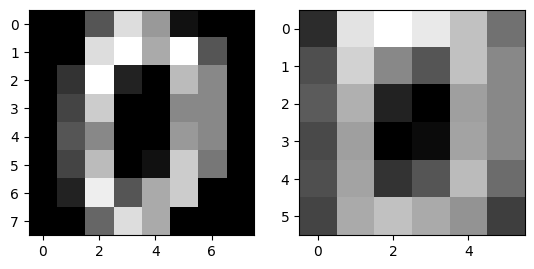

In [8]:
plt.subplot(1, 2, 1)  # выводм исходный и полученый результаты в черно-белой цветовой гамме
plt.imshow(dataset.images[0], cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(conv_image, cmap='gray')

plt.show()

 Задача 2\.

2\.1\. Загрузите файл [`tweet_emotions.csv`](https://disk.yandex.ru/d/VDxYpWhIwo24gQ) в виде `pandas.DataFrame`. Разбейте загруженный фрейм на обучающее и тестовое множество в соотношении 70% на 30% с сохранением распределения по столбцу `sentiment`. 

2\.2\. Преобразуйте тексты отзывов в числовые векторы любым адекватным способом. Закодируйте названия классов целыми числами любыми адекватным способом (например, можно воспользоваться функцией:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html ).

2\.3\. Настройте модель KNN для классификации текстов отзывов. Используя поиск по сетке, найдите оптимальную комбинацию гиперпараметров (`n_neighbors`, `weight`, `metric`). Для оценки качества используйте метрику F1-macro. Соберите результаты поиска по сетке и выведите результат на экран, отсортировав строки по убыванию качества модели. 

2\.4\. Уменьшите размерность полученных вами векторных представлений до двух при помощи любого известного вам метода уменьшения размерности и визуализируйте точки данных, раскрасив их в цвета, соответствующие меткам класса.

2\.5\. Используя лучшую из обученных моделей, сделайте прогноз для тестовых данных. Выведите на экран отчет по классификации.

In [9]:
data = pd.read_csv('/Users/admin/Downloads/tweet_emotions.csv')
data

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [10]:
for i in data.content.head(10):  # смотрим на входные данные
    print(i)

@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[
Layin n bed with a headache  ughhhh...waitin on your call...
Funeral ceremony...gloomy friday...
wants to hang out with friends SOON!
@dannycastillo We want to trade with someone who has Houston tickets, but no one will.
Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends
I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!
Hmmm. http://www.djhero.com/ is down
@charviray Charlene my love. I miss you
@kelcouch I'm sorry  at least it's Friday?


In [11]:
X, y = data.content, data.sentiment  # обозначаем переменные
X.shape, y.shape

((40000,), (40000,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)  # делим данные на тестовую и тренировочную выборки 70 на 30
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28000,), (12000,), (28000,), (12000,))

In [13]:
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=5, max_features=1000)  # используйем TF-IDF векторизатор
X_train_tfidf = tfidf_vect.fit_transform(X_train)  # учитывая важность употребление каждого слова в предложении и тексте
X_test_tfidf = tfidf_vect.transform(X_test)
np.random.choice(tfidf_vect.get_feature_names_out(), 10)

array(['pic', 'pics', 'huh', 'shoes', 'starting', 'stomach', 'seen',
       'need', 'buy', 'packing'], dtype=object)

In [14]:
label_encoder = LabelEncoder()  # перобразовывает таргетные значения в численные
y_train_en = label_encoder.fit_transform(y_train)
y_test_en = label_encoder.transform(y_train)
y_train_en

array([ 5, 12, 10, ...,  8, 12,  8])

In [15]:
knn = KNeighborsClassifier()  # создаем объект класса

In [16]:
f1_sc = make_scorer(f1_score, average='macro')  # задаем функцию оценки

param_grid = {  # и указываем возможные параметры модели
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [17]:
grid_search = GridSearchCV(knn, param_grid, scoring=f1_sc, cv=5)  # создаем и используйем поиск
grid_search.fit(X_train_tfidf, y_train_en)  # по сетке для получения лучшей модели

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score, response_method='predict', average=macro))

In [18]:
grid_res = pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score')
print(grid_res[['params', 'mean_test_score', 'std_test_score']])

                                               params  mean_test_score  \
2   {'metric': 'euclidean', 'n_neighbors': 5, 'wei...         0.100077   
3   {'metric': 'euclidean', 'n_neighbors': 5, 'wei...         0.099960   
1   {'metric': 'euclidean', 'n_neighbors': 3, 'wei...         0.096305   
5   {'metric': 'euclidean', 'n_neighbors': 7, 'wei...         0.094189   
4   {'metric': 'euclidean', 'n_neighbors': 7, 'wei...         0.092845   
0   {'metric': 'euclidean', 'n_neighbors': 3, 'wei...         0.090931   
6   {'metric': 'euclidean', 'n_neighbors': 9, 'wei...         0.087597   
7   {'metric': 'euclidean', 'n_neighbors': 9, 'wei...         0.087422   
9   {'metric': 'manhattan', 'n_neighbors': 3, 'wei...         0.066058   
8   {'metric': 'manhattan', 'n_neighbors': 3, 'wei...         0.063998   
11  {'metric': 'manhattan', 'n_neighbors': 5, 'wei...         0.059372   
10  {'metric': 'manhattan', 'n_neighbors': 5, 'wei...         0.057681   
13  {'metric': 'manhattan', 'n_neighbo

In [19]:
best_model = grid_search.best_estimator_
prediction = best_model.predict(X_test_tfidf)
prediction

array([8, 8, 8, ..., 8, 2, 8])

In [26]:
accuracy_score(y_test, label_encoder.inverse_transform(prediction))

0.22033333333333333

### Вывод: Аккуратность и f1 мера не внушают доверия, поэтому как мне кажется стоит рассмотреть другие методы векторизации текста или модели для его обработки.